Imports

In [1]:
import os
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import random

Base

In [162]:
df = pd.read_excel("normalizado-Amaro.xlsx",header = None)
len(df)

609

In [164]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
0,Normal,797.734558,797.615051,797.690674,797.818909,797.674255,797.742920,798.512390,798.507996,798.370605,...,592.758179,592.893188,592.965149,593.009094,592.994629,592.928894,592.828064,592.817322,592.885742,593.006104
1,Normal,593.115662,593.115662,593.170715,593.274963,593.274963,593.375549,593.471680,593.639771,593.639771,...,794.532776,794.507629,794.468628,794.518921,794.535034,794.483826,794.493408,794.505615,794.437073,794.261597
2,Normal,794.192749,794.239014,794.257629,794.186707,794.127502,794.175903,794.500427,794.881958,794.997620,...,589.773987,589.802795,589.832947,589.741333,589.665588,589.626099,589.642212,589.750183,589.902771,590.020081
3,Normal,590.020813,590.020813,589.977661,589.938660,589.954895,589.926147,589.963684,589.987915,590.037109,...,798.350403,798.410889,798.479431,798.552979,798.631042,798.580078,798.458191,798.403076,798.316956,798.115662
4,Normal,798.037537,797.895447,797.840881,797.751831,797.693970,797.746033,797.748901,798.037537,797.618042,...,590.664490,590.698486,590.647827,590.599243,590.579773,590.579163,590.594727,590.590759,590.623535,590.630615


In [166]:
nova_df_x = df.drop([0],axis=1)

In [168]:
df['fadiga'] = [0 if x == 'Normal' else 1 for x in df[0]]
nova_df_y =  df['fadiga']

In [170]:
count = 0
for i in nova_df_y:
    if i == 0:
        count += 1
print(count/len(nova_df_y))

0.8850574712643678


Treino e Teste

In [173]:
#column_indices = {name: i for i, name in enumerate(nova_df.columns)}
n = len(nova_df_x)
train_df_x = nova_df_x[0:int(n*0.7)]
val_df_x = nova_df_x[int(n*0.7):int(n*0.9)]
test_df_x = nova_df_x[int(n*0.9):]

train_df_y = nova_df_y[0:int(n*0.7)]
val_df_y = nova_df_y[int(n*0.7):int(n*0.9)]
test_df_y = nova_df_y[int(n*0.9):]

train_x,train_y = train_df_x,train_df_y
val_x,val_y = val_df_x,val_df_y
test_x,test_y = test_df_x,test_df_y
num_features = test_df_x.shape[1]

In [175]:
train_x

,1,2,3,4,5,6,7,8,9,10,...,176,177,178,179,180,181,182,183,184,185
0,797.734558,797.615051,797.690674,797.818909,797.674255,797.742920,798.512390,798.507996,798.370605,798.257385,...,592.758179,592.893188,592.965149,593.009094,592.994629,592.928894,592.828064,592.817322,592.885742,593.006104
1,593.115662,593.115662,593.170715,593.274963,593.274963,593.375549,593.471680,593.639771,593.639771,593.761108,...,794.532776,794.507629,794.468628,794.518921,794.535034,794.483826,794.493408,794.505615,794.437073,794.261597
2,794.192749,794.239014,794.257629,794.186707,794.127502,794.175903,794.500427,794.881958,794.997620,795.308777,...,589.773987,589.802795,589.832947,589.741333,589.665588,589.626099,589.642212,589.750183,589.902771,590.020081
3,590.020813,590.020813,589.977661,589.938660,589.954895,589.926147,589.963684,589.987915,590.037109,590.070435,...,798.350403,798.410889,798.479431,798.552979,798.631042,798.580078,798.458191,798.403076,798.316956,798.115662
4,798.037537,797.895447,797.840881,797.751831,797.693970,797.746033,797.748901,798.037537,797.618042,797.338501,...,590.664490,590.698486,590.647827,590.599243,590.579773,590.579163,590.594727,590.590759,590.623535,590.630615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,584.359863,584.359863,584.359863,584.359863,584.359863,584.359863,584.359863,584.359863,584.359863,584.359863,...,793.075500,792.936951,792.932617,792.930969,792.948059,793.020508,793.045593,792.984741,792.737366,792.549805
422,792.393372,792.267822,792.264648,792.205994,792.163696,792.090271,791.645020,791.604431,791.660400,791.711426,...,583.704651,583.715576,583.511353,583.572815,583.441467,583.552490,583.602417,583.682068,583.601807,583.684937
423,583.458984,583.458984,583.458984,583.557861,583.557861,583.665771,583.665771,583.846497,583.846497,583.831848,...,793.833740,793.794128,793.916687,793.886841,794.048218,794.003479,793.967651,793.695496,793.516296,793.295105
424,793.093445,792.994812,792.862976,792.622192,792.309509,792.356689,792.415161,792.457275,792.401855,792.302307,...,588.563782,588.600281,588.596436,588.610840,588.470703,588.389832,588.378052,588.648254,588.725525,588.954407


Normalização

In [178]:
train_mean = train_x.mean()
train_std = train_x.std()

train_x = (train_x - train_mean) / train_std
val_x = (val_x - train_mean) / train_std
test_x = (test_x - train_mean) / train_std

In [180]:
num_classes = len(np.unique(train_y))

In [182]:
train_x = train_x.to_numpy()
val_x = val_x.to_numpy()
test_x = test_x.to_numpy()

In [184]:
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1], 1))

In [186]:
train_x.shape

(426, 185, 1)

Modelo

In [189]:
def make_model_lstm(input_shape):
    input_layer = tf.keras.layers.Input(input_shape)
    lstm1 = tf.keras.layers.LSTM(16,return_sequences=True)(input_layer)
    lstm2 = tf.keras.layers.LSTM(8)(lstm1)
    output_layer = tf.keras.layers.Dense(num_classes)(lstm2)
    return tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [191]:
def make_model_rnn(input_shape):
    input_layer = tf.keras.layers.Input(input_shape)
    rnn1 = tf.keras.layers.SimpleRNN(16,return_sequences=True)(input_layer)
    rnn2 = tf.keras.layers.SimpleRNN(8)(rnn1)
    output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(rnn2)
    return tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [193]:
def make_model_cnn(input_shape):
    input_layer = tf.keras.layers.Input(input_shape)
    cn2 = tf.keras.layers.Conv1D(32,kernel_size=3,padding="same")(input_layer)
    max = tf.keras.layers.MaxPooling1D()(cn2)
    flat = tf.keras.layers.Flatten()(max)
    output_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(flat)
    return tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [195]:
def make_model_fcnn(input_shape):
    input_layer = tf.keras.layers.Input(input_shape)

    conv1 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    conv1 = tf.keras.layers.ReLU()(conv1)

    conv2 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = tf.keras.layers.BatchNormalization()(conv2)
    conv2 = tf.keras.layers.ReLU()(conv2)

    conv3 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = tf.keras.layers.BatchNormalization()(conv3)
    conv3 = tf.keras.layers.ReLU()(conv3)

    gap = tf.keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = tf.keras.layers.Dense(num_classes, activation="softmax")(gap)

    return tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [197]:
model_lstm = make_model_lstm(input_shape= train_x.shape[1:])

model_lstm.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 185, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 185, 16)             │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,970 (7.70 KB)

 Trainable params: 1,970 (7.70 KB)

 Non-trainable params: 0 (0.00 B)

In [199]:
model_rnn = make_model_rnn(input_shape= train_x.shape[1:])

model_rnn.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 185, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ (None, 185, 16)             │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 8)                   │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 506 (1.98 KB)

 Trainable params: 506 (1.98 KB)

 Non-trainable params: 0 (0.00 B)

In [201]:
model_cnn = make_model_cnn(input_shape= train_x.shape[1:])

model_cnn.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 185, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 185, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 92, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2944)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │           5,890 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,018 (23.51 KB)

 Trainable params: 6,018 (23.51 KB)

 Non-trainable params: 0 (0.00 B)

Parametros utilizados para rodar as Épocas

In [204]:
epochs = 50
batch_size = 32

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=10, min_lr=0.0001
    ),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1),
]

LSTM

In [207]:
model_lstm.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model_lstm.fit(
    train_x,
    train_y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - loss: 6.6191 - sparse_categorical_accuracy: 0.5623 - val_loss: 5.6426 - val_sparse_categorical_accuracy: 0.6047 - learning_rate: 0.0010
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 4.5877 - sparse_categorical_accuracy: 0.6455 - val_loss: 1.7737 - val_sparse_categorical_accuracy: 0.8721 - learning_rate: 0.0010
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.8725 - sparse_categorical_accuracy: 0.9377 - val_loss: 1.8212 - val_sparse_categorical_accuracy: 0.8721 - learning_rate: 0.0010
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.8752 - sparse_categorical_accuracy: 0.9386 - val_loss: 1.8177 - val_sparse_categorical_accuracy: 0.8721 - learning_rate: 0.0010
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 1.3306 - sparse_categorical_accuracy: 0.9062 - val_loss: 1.7935 - val_sparse_categorical_accuracy: 0.8721 - learning_rate: 0.0010
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - l

In [208]:
model_lstm = tf.keras.models.load_model("best_model.keras")

test_loss, test_acc = model_lstm.evaluate(test_x, test_y)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.3428 - sparse_categorical_accuracy: 0.7423
Test accuracy 0.7540983557701111
Test loss 0.3408936560153961


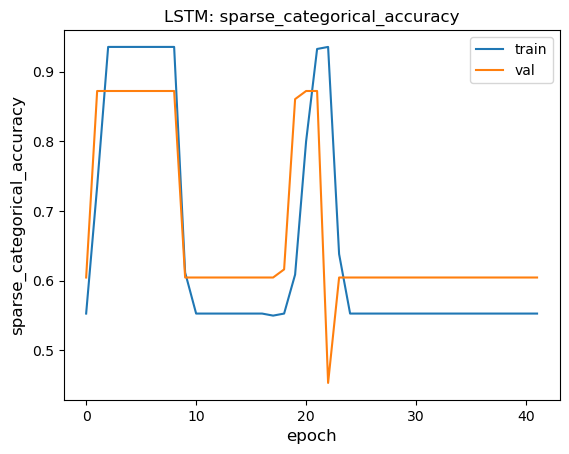

In [209]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("LSTM: " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

RNN

In [213]:
model_rnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model_rnn.fit(
    train_x,
    train_y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.6930 - sparse_categorical_accuracy: 0.5046 - val_loss: 0.6608 - val_sparse_categorical_accuracy: 0.6047 - learning_rate: 0.0010
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.6587 - sparse_categorical_accuracy: 0.5515 - val_loss: 0.6299 - val_sparse_categorical_accuracy: 0.6047 - learning_rate: 0.0010
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.6234 - sparse_categorical_accuracy: 0.6424 - val_loss: 0.5851 - val_sparse_categorical_accuracy: 0.8721 - learning_rate: 0.0010
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.5431 - sparse_categorical_accuracy: 0.9296 - val_loss: 0.4809 - val_sparse_categorical_accuracy: 0.8721 - learning_rate: 0.0010
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.4102 - sparse_categorical_accuracy: 0.9296 - val_loss: 0.4116 - val_sparse_categorical_accuracy: 0.8721 - learning_rate: 0.0010
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - l

In [214]:
model_rnn = tf.keras.models.load_model("best_model.keras")

test_loss, test_acc = model_rnn.evaluate(test_x, test_y)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.5912 - sparse_categorical_accuracy: 0.7423
Test accuracy 0.7540983557701111
Test loss 0.5675451755523682


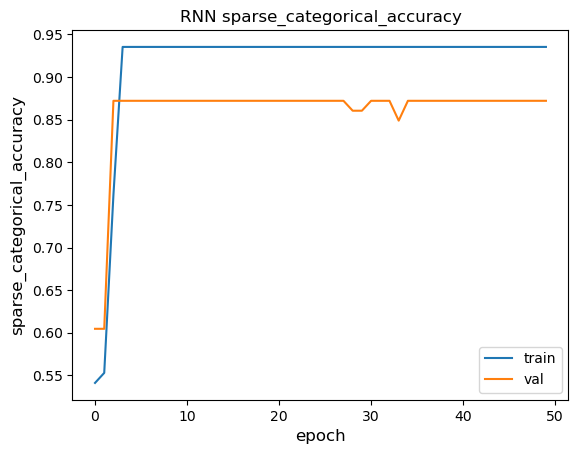

In [215]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("RNN " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

CNN

In [217]:
model_cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model_cnn.fit(
    train_x,
    train_y,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.7243 - sparse_categorical_accuracy: 0.5032 - val_loss: 0.6328 - val_sparse_categorical_accuracy: 0.8605 - learning_rate: 0.0010
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5653 - sparse_categorical_accuracy: 0.8688 - val_loss: 0.4623 - val_sparse_categorical_accuracy: 0.8721 - learning_rate: 0.0010
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3816 - sparse_categorical_accuracy: 0.9155 - val_loss: 0.3469 - val_sparse_categorical_accuracy: 0.8721 - learning_rate: 0.0010
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2127 - sparse_categorical_accuracy: 0.9468 - val_loss: 0.3482 - val_sparse_categorical_accuracy: 0.8721 - learning_rate: 0.0010
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1633 - sparse_categorical_accuracy: 0.9564 - val_loss: 0.3523 - val_sparse_categorical_accuracy: 0.8721 - learning_rate: 0.0010
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0

In [218]:
model_cnn = tf.keras.models.load_model("best_model.keras")

test_loss, test_acc = model_cnn.evaluate(test_x, test_y)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5386 - sparse_categorical_accuracy: 0.7423  
Test accuracy 0.7540983557701111
Test loss 0.5328713655471802


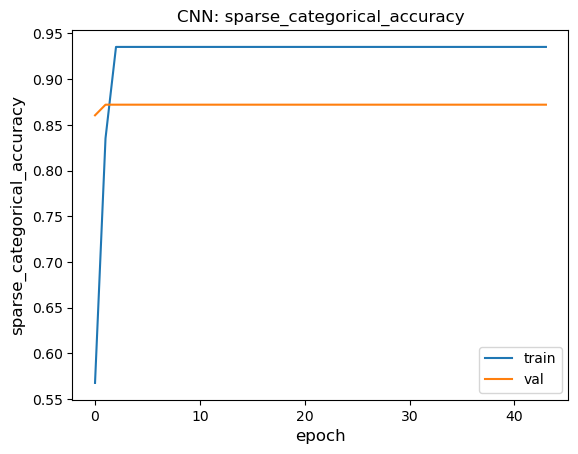

In [219]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("CNN: " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()